# Heart Attack Prediction Model

**The main objective of this experiment is to test three different Supervised Machine Learning Classification algorithms, Logistic Regression, Support Vector Machine and Decision Tree Classifier on a binary classification problem related to health (heart attack). The problem is a supervised learning classification problem, and the objective is to find out which of the three mentioned algorithms works better for this kind of data.**

Health is one of the worlds biggest concerns and challenges, both public and private health systems are begining to use Machine Learning as a way to create diagnostic tools to improve the overall system.

One of the particular systems that can be of great assistance to health systems are diagnostic ones, especially those that can figure out if a person is suffering or might suffer from a particular condition. A good diagnostic system would be able to give a clean diagnosis (no disease) with a very high level of accuracy (close to 100%) so as to be able to reduce the preassure of the health systems in this area, and save the time of the health professionals for the people who are actually sick.

In Machine Learning terms, we want to have a system with a very high recall, that although it might allow some non sick people thorugh (false possitives), hopefully has a 0% rate of false negatives, hence all sick people will get treated.

**Because of this, it is important to figure out which type of algorithm tends to give us better results with the tyes of data health systems have been collecting for years.**

You can find all of the information and documents related to this project in the github repository on this link: https://github.com/jackraiferbaruch/machine_learning_supervised_models

### Heard Attack Model

This project will attempt to use the **CDC's Indicators of Heart Disease dataset from 2022** ('https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease'), to **create a models using Logistic Regression, SVM and Desicion Tree Classification**, that has high scores for predicting heart attacks based on the available data, especially paying attention to the **recall score**.

### About the Dataset

The dataset is available from Kaggle on '[this link](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)'.

It contains 246,022 observations in tabular format registered by the CDC in 2022 in the United States. It also contains 40 columns, down from the original 300. 

Here is the column descriptions and data types:

- **State**                         String describing the state where the info was collected.
- **Sex**                           Male / Female string describing the sex of the individual in the observation.
- **GeneralHealth**                 String defining the general health of the patient in ordinal terms.
- **PhysicalHealthDays**            Float displaying the amount of days the person took off because of phisical health issues.
- **MentalHealthDays**              Float displaying the amount of days the person took off because of mental health issues.
- **LastCheckupTime**               String with ordinal scale defining the time frame in which the person had their last medical checkup.
- **PhysicalActivities**            Yes / No binary string defining if the person engages or not in physical activity.
- **SleepHours**                    Float defining the average hours of sleep per night.
- **RemovedTeeth**                  String with ordinal categories regarding how many teeth the person has had removed.
- **HadHeartAttack**                Yes / No binary string defining if the person has previously had a heart attack. This will be our target variable.
- **HadAngina**                     Yes / No binary string defining if the person has previously had angina.
- **HadStroke**                     Yes / No binary string defining if the person has previously had a stroke.
- **HadAsthma**                     Yes / No binary string defining if the person has previously had asthma.
- **HadSkinCancer**                 Yes / No binary string defining if the person has previously had skin cancer.
- **HadCOPD**                       Yes / No binary string defining if the person has previously had COPD.
- **HadDepressiveDisorder**         Yes / No binary string defining if the person has previously had Depression.
- **HadKidneyDisease**              Yes / No binary string defining if the person has previously had Kidney Disease.
- **HadArthritis**                  Yes / No binary string defining if the person has previously had Arthritis.
- **HadDiabetes**                   String with ordinal categories regarding if the person has had Diabetes.
- **DeafOrHardOfHearing**           Yes / No binary string defining if the person has previously had Hearing Issues.
- **BlindOrVisionDifficulty**       Yes / No binary string defining if the person has previously had Blindness Issues.
- **DifficultyConcentrating**       Yes / No binary string defining if the person has previously had Problems Concentrating.
- **DifficultyWalking**             Yes / No binary string defining if the person has previously had Problems Walking.
- **DifficultyDressingBathing**     Yes / No binary string defining if the person has previously had Problems Dressing or Bathing.
- **DifficultyErrands**             Yes / No binary string defining if the person has previously had Problems Running Errands.
- **SmokerStatus**                  String with ordinal categories regarding the person's relation with smoking.
- **ECigaretteUsage**               String with ordinal categories regarding the person's relation with E Cigarrete Usage.
- **ChestScan**                     Yes / No binary string defining if the person has previously had a chest scan.
- **RaceEthnicityCategory**         String variable concerning the race or ethnicity of the person.
- **AgeCategory**                   String variable with Age Bins.
- **HeightInMeters**                Float describing the person's height in meters.
- **WeightInKilograms**             Float describing the person's weight in kilograms.
- **BMI**                           Float describing the person's BMI (Body Mass Index).
- **AlcoholDrinkers**               Yes / No binary string defining if the person drinks alcohol or not.
- **HIVTesting**                    Yes / No binary string defining if the person has had an HIV test.
- **FluVaxLast12**                  Yes / No binary string defining if the person has had a Flu Vacicine.
- **PneumoVaxEver**                 Yes / No binary string defining if the person has had the Pneumonia Vaccine.
- **TetanusLast10Tdap**             String ordinal describing if the person has had a tetanus shot in the last 10 years, and if it was the TDap.
- **HighRiskLastYear**              Yes / No binary string defining if the person was considered High Risk the last year.
- **CovidPos**                      Yes / No binary string defining if the person has been tested positive for Covid.

It is very important to consider that this dataset has already been cleaned, and contains no null values. All observations with null values have been previously removed.

Also, many of the columns contain string data that needs to be cleaned by either transforming it into binary numeric data (0,1) or using numeric ordered data. We will talk more about this as we clean each of the columns.


### Steps to build the models

I will go through a series of steps to build our model:

1. Data Cleaning and EDA - First off, cleaning our data, since we have too many non numeric variables. Then understanding the data, what our target variable will be and what could be the best predictors.
2. Building an ML model - Create 3 models with all variables for Logistic Regression, SVM and Desicion Tree Classifier using base algorithms from SciKitLearn and the cleaned dataset.
3. Evaluate the models - Using several metrics to evaluate the model, with a special enphasis on Recall.
4. Conclusions and suggestions - Make our conclusions based on the results and make suggestions and recommendations for future work.

## Step 1. Data Cleaning and EDA

In this step, we will import the data, clean it and do some EDA including understadning the factors that are more highly correlated with the variable Heart Attack.

Most of the data cleaning will be transforming ordinal string or binary variables into numeric variables so that we can use them in our models.

Please refer to the comments in code for specifics.

In [1]:
# Import the Pandas Library
import pandas as pd

In [2]:
# Load the data into a dataframe hdd (heart disease data)

hdd = pd.read_csv('heart_disease_2022.csv')

In [3]:
# Take a look at the first few rows of the dataset

hdd.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


Some initial interesting observations about this dataset:

- The state info could be interesting, but might also create issues when it comes to a generalized model.
- There are many binary columns, related to vaccinations, weather the person does phisical activity, smoking, drinking and similar ones. This should be converted into actual binary (1, 0) instead of yes or no variables. Especially true for the HadHeartAttack column which will become the target variable to predict.
- The GeneralHealth column is interesting, but we need to transform it into a numeric scale as well. Since we want to make predictions, maybe a scale that measures better health with a lower number might work better, but we need to test and find thatb out.
- The LastCheckupTime also needs to be converted to binary where 1 means they have had a checkup in the last 12 months and 0 means they have not.
- PhysicalHealthDays and MentalHealthDays is interesting, since it measures the time off people had the last 12 months regarding health issues, physical or mental. Have to explore how relevant both of these are for heart disease.

In [4]:
# Check the shape of the dataframe

hdd.shape

(246022, 40)

Here we can confirm that our dataset consists of 246,022 observations and 40 columns.

In [5]:
# Get a general description of the dataset

hdd.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


There are too many columns which are not numeric, most of them binary and some of them ordinal, hence we need to change that before we go any further as to be able to run a good correlation analysis and to facilitate them as inputs to our models.

In [6]:
# Replace all of the values in Yes/No colums for binary 1/0 columns.

hdd.replace({'Yes':1, 'No':0}, inplace=True)

In [7]:
# Replace values in LastCheckupTime to ordinal numeric, since there is an implication that more recent checkups are better.

hdd['LastCheckupTime'].replace({'Within past year (anytime less than 12 months ago)':0,
             'Within past 2 years (1 year but less than 2 years ago)':1,
             'Within past 5 years (2 years but less than 5 years ago)':2,
             '5 or more years ago':3}, inplace=True)

In [8]:
# Replace values in GeneralHealth to ordinal numeric, since there is a clear ordinal implication.

hdd['GeneralHealth'].replace({'Excellent':0,
             'Very good':1,
             'Good':2,
             'Fair':3,
             'Poor': 4}, inplace=True)

In [9]:
# Replace values in RemovedTeeth to ordinal numeric.

hdd['RemovedTeeth'].replace({'None of them':0,
             '1 to 5':1,
             '6 or more, but not all':2,
             'All':3}, inplace=True)

In [10]:
# Replace values in TetanusLast10Tdap to ordinal numeric. There is an implication that having a tetanus shot within 10 years is good, and that
# it being Tdap is better.

hdd['TetanusLast10Tdap'].replace({'Yes, received Tdap':0,
             'Yes, received tetanus shot but not sure what type':1,
             'Yes, received tetanus shot, but not Tdap':2,
             'No, did not receive any tetanus shot in the past 10 years':3}, inplace=True)

In [11]:
# Replace values in Sex to binary.

hdd['Sex'].replace({'Male':0,
             'Female':1}, inplace=True)

In [12]:
# For  AgeCategory, we will use the starting bin age as an integer. Age is an important variable, and since it is binned, we can just keep the 
# lower age as a way to indicate age.

def extract_numbers(s):
    numbers = s[4:6] # This is where the bottom bin number is
    return int(numbers)

hdd['AgeBinStart'] = hdd['AgeCategory'].apply(extract_numbers)

In [13]:
# Replace non numeric values in CovidPos to ordinal numeric (home testing will count as 1 as well).

hdd['CovidPos'].replace({0:0,
             1:1,
             'Tested positive using home test without a health professional':1}, inplace=True)

In [14]:
# For ECigaretteUsage we will go binary between yes and no with no other consideration, not currently will be classified as yes.

hdd['ECigaretteUsage'].replace({'Never used e-cigarettes in my entire life':0,
             'Use them some days':1,
             'Not at all (right now)':1,
             'Use them every day':1}, inplace=True)

In [15]:
# For SmokerStatus, we will use 0 for former smoker or non smoker and 1 for current smoker.

hdd['SmokerStatus'].replace({'Former smoker':0,
             'Never smoked':0,
             'Current smoker - now smokes every day':1,
             'Current smoker - now smokes some days':1}, inplace=True)

In [16]:
# For HadDiabetes, we will have 3 levels, 0 for non, 1 borderline and 2 for yes. Only during pregnancy will be classified as 0.

hdd['HadDiabetes'].replace({0:0,
             1:2,
             'Yes, but only during pregnancy (female)':0,
             'No, pre-diabetes or borderline diabetes':1}, inplace=True)

Finally we will remove the colums we are not using.

- State: since we are not going to worry about location at the moment, and because it might generate bias.
- Age category, since we transformed it to bottom age bin, so as to have a numeric variable.
- Race and Ethnicity, because it might introduce bias into our model.

In [17]:
hdd = hdd.drop(columns = ['State', 'AgeCategory', 'RaceEthnicityCategory'])

In [18]:
hdd.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,AgeBinStart
0,1,1,4.0,0.0,0,1,9.0,0,0,0,...,71.67,27.99,0,0,1,1,0,0,0,65
1,0,1,0.0,0.0,0,1,6.0,0,0,0,...,95.25,30.13,0,0,1,1,1,0,0,70
2,0,1,0.0,0.0,0,0,8.0,2,0,0,...,108.86,31.66,1,0,0,1,3,0,1,75
3,1,3,5.0,0.0,0,1,9.0,0,0,0,...,90.72,31.32,0,0,1,1,3,0,1,80
4,1,2,3.0,15.0,0,1,5.0,1,0,0,...,79.38,33.07,0,0,1,1,3,0,0,80


Now that we have a cleaned dataset with only numeric values, we can start looking deeper into it.

In [19]:
# Check the describe function to get a feel for the dataset

hdd.describe()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,AgeBinStart
count,246022.00000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,...,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,0.51951,1.510084,4.119026,4.167140,0.339031,0.777646,7.021331,0.682606,0.054609,0.060779,...,83.615179,28.668136,0.549979,0.343473,0.533269,0.406029,1.459626,0.042988,0.319955,53.483758
std,0.49962,1.032808,8.405844,8.102687,0.775630,0.415829,1.440681,0.873861,0.227216,0.238925,...,21.323156,6.513973,0.497497,0.474869,0.498893,0.491091,1.218321,0.202831,0.466460,17.538961
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,28.120000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,...,68.040000,24.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000
50%,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,...,81.650000,27.460000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,55.000000
75%,1.00000,2.000000,3.000000,4.000000,0.000000,1.000000,8.000000,1.000000,0.000000,0.000000,...,95.250000,31.890000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,70.000000
max,1.00000,4.000000,30.000000,30.000000,3.000000,1.000000,24.000000,3.000000,1.000000,1.000000,...,292.570000,97.650000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,80.000000


Check the correlation table to find what the most important variables for Heart Attack prediction would be.

In [20]:
hdd.corr()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,AgeBinStart
Sex,1.000000,0.018106,0.044081,0.091705,-0.106042,-0.059334,0.015793,0.012033,-0.073316,-0.065590,...,-0.349416,-0.007782,-0.093824,0.013266,0.067484,0.062705,-0.023213,-0.049911,0.018875,0.054015
GeneralHealth,0.018106,1.000000,0.489091,0.268539,-0.077702,-0.278371,-0.068927,0.281152,0.185680,0.201036,...,0.184140,0.243437,-0.178229,0.042415,0.025930,0.140265,0.067694,0.006507,-0.001593,0.131197
PhysicalHealthDays,0.044081,0.489091,1.000000,0.306800,-0.063144,-0.240842,-0.056063,0.190137,0.133420,0.149130,...,0.077505,0.116905,-0.129370,0.055652,0.016741,0.101219,0.022336,0.005226,0.022498,0.089913
MentalHealthDays,0.091705,0.268539,0.306800,1.000000,0.046251,-0.110531,-0.130100,0.053906,0.025892,0.024086,...,0.042441,0.082182,-0.025991,0.124789,-0.057823,-0.025422,-0.010232,0.114210,0.045061,-0.190021
LastCheckupTime,-0.106042,-0.077702,-0.063144,0.046251,1.000000,0.024504,-0.054684,-0.065555,-0.065753,-0.080311,...,-0.009168,-0.057247,0.044513,-0.005615,-0.224618,-0.200185,0.096107,0.055302,-0.011270,-0.235361
PhysicalActivities,-0.059334,-0.278371,-0.240842,-0.110531,0.024504,1.000000,0.003188,-0.195829,-0.083187,-0.078761,...,-0.093823,-0.158922,0.157835,0.018492,0.030820,-0.051405,-0.100721,0.017668,0.019569,-0.107332
SleepHours,0.015793,-0.068927,-0.056063,-0.130100,-0.054684,0.003188,1.000000,-0.002484,0.003631,0.011537,...,-0.054691,-0.054750,-0.003540,-0.074169,0.066836,0.060531,0.004566,-0.043797,-0.045945,0.124338
RemovedTeeth,0.012033,0.281152,0.190137,0.053906,-0.065555,-0.195829,-0.002484,1.000000,0.165904,0.154966,...,0.028214,0.073271,-0.190670,-0.023298,0.024958,0.168634,0.111900,-0.043738,-0.069483,0.348687
HadHeartAttack,-0.073316,0.185680,0.133420,0.025892,-0.065753,-0.083187,0.003631,0.165904,1.000000,0.445903,...,0.038436,0.030413,-0.074181,-0.014563,0.045235,0.119955,0.026341,-0.021127,-0.024529,0.171457
HadAngina,-0.065590,0.201036,0.149130,0.024086,-0.080311,-0.078761,0.011537,0.154966,0.445903,1.000000,...,0.046085,0.040676,-0.067258,-0.024324,0.076010,0.157748,0.013478,-0.027410,-0.019887,0.197953


Since the above table is very large, we can do two things to figure out the most relevant and most irrelevant variables. Build a correlation heatmap and a correlation value list.

In [21]:
# Libraries for building a correlation heatmap

import matplotlib.pyplot as plt
import seaborn as sns

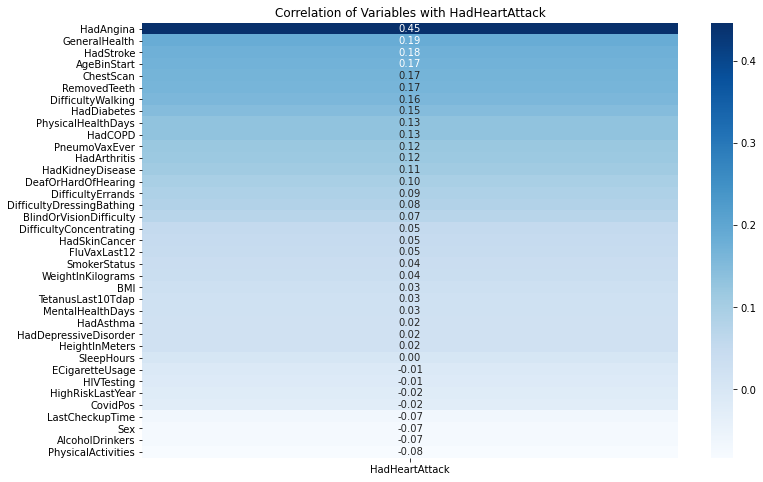

In [22]:
# Build a correlation heatmap focused on the heart attack variable

corr_to_target = hdd.corr()['HadHeartAttack'].drop('HadHeartAttack')
corr_to_target_df = pd.DataFrame(corr_to_target)
sorted_corr = corr_to_target.sort_values(ascending=False)
sorted_corr_df = pd.DataFrame(sorted_corr)

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(sorted_corr_df, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation of Variables with HadHeartAttack')
plt.show()

From here we can see that many variables have some correlation to Heart Attack, mostly possitive, some of them negative, however, we will be using all of them as to evaluate the different models performance.

## 2. Building an ML model

The chocie of using supervised classification models is because we are trying to predict one binary variable. We do not know which model will deliver better results, hence we will be testing 3 of them. Logistic Regression, SVM and Desicion Tree Classifier.

Then we will evaluate all of them and compare the results.

### First Model - Logistic Regression

Our first model will be Logistic Regression using SciKitLearns `LogisticRegression` class.

In [23]:
# Import needed libraries

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score
from sklearn.metrics import confusion_matrix

In [24]:
# Here we will build our X and y variables for the models. y being the HeartAttack column and X being the rest of the dataset.

y = hdd['HadHeartAttack'] # target variable from the column HeartAttack
X = hdd.drop(columns = ['HadHeartAttack'])

In [25]:
# Now we split the data into training and testing sets with an 80/20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=52)

In [26]:
# Now we will instantiate our LogisticRegression model.
# We will be using 2000 iterations so as to make sure our model converges.
# Because of the small dataset, we will use liblinear solver.
# Verbosity is set to one because liblinear solver needs possitive verbosity.
# Warm Start is set to True to take even more advantage of the liblinear solver.


lg = LogisticRegression(max_iter = 2000, solver = 'liblinear', verbose = 1, warm_start = True)

In [27]:
# Train the model

lg.fit(X, y)

[LibLinear]

LogisticRegression(max_iter=2000, solver='liblinear', verbose=1,
                   warm_start=True)

Now that we have our Logistic Regression Model, we will get our scores, which we will use in the Evaluation phase.

In [28]:
# Logistic Regression Model scores

lg_pred = lg.predict(X_test)

lg_acc = accuracy_score(y_test, lg_pred)
lg_prec = precision_score(y_test, lg_pred)
lg_rec = recall_score(y_test, lg_pred)
lg_f1 = f1_score(y_test, lg_pred)

print("Logistic Regression Accuracy:", lg_acc)
print("Logistic Regression Precision:", lg_prec)
print("Logistic Regression Recall:", lg_rec)
print("Logistic Regression F1 Score:", lg_f1)

Logistic Regression Accuracy: 0.9488669850624937
Logistic Regression Precision: 0.570957095709571
Logistic Regression Recall: 0.25744047619047616
Logistic Regression F1 Score: 0.3548717948717949


In [29]:
# We will also visualize the confusion matrix of our Logistic Regression model

lg_conf_matrix = confusion_matrix(y_test, lg_pred)

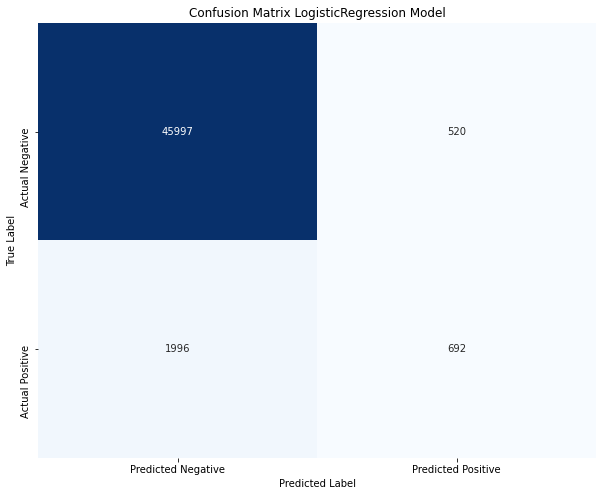

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(lg_conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix LogisticRegression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Initially, we can see that our model, although it has a high level of accuracy, we have a lot of false negatives, which is a big problem, hence the low recall and f1 scores. The next step is building a model with more variables to see if our results improve.

### Second Model - SVM - Support Vector Machine

Now we will build a using the Suport Vector Machine algorithm. We will be using the `SVC` class from SKLearn (Support Vector Classifier).

We will also be using the same test/train split as before.

In [31]:
# Import the SVC class

from sklearn.svm import SVC 

In [32]:
# Instantiate the moel. We will use 2000 max iterations.
# Gamma is set to auto.
# Probability estimates set to True.
# Decision Function set to One vs One.

svm = SVC(max_iter = 2000, gamma = 'auto', probability = True, decision_function_shape = 'ovo')

In [34]:
# Train the SVM model

svm.fit(X_train, y_train)

C:\Users\jraif\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(max_iter=2000)

In [35]:
# Model scores

svm_pred = svm.predict(X_test)

svm_acc = accuracy_score(y_test, svm_pred)
svm_prec = precision_score(y_test, svm_pred)
svm_rec = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)

print("SVM Accuracy:", svm_acc)
print("SVM Precision:", svm_prec)
print("SVM Recall:", svm_rec)
print("SVM F1 Score:", svm_f1)

SVM Accuracy: 0.05796158926938319
SVM Precision: 0.054538777009242825
SVM Recall: 0.9944196428571429
SVM F1 Score: 0.10340625544014391


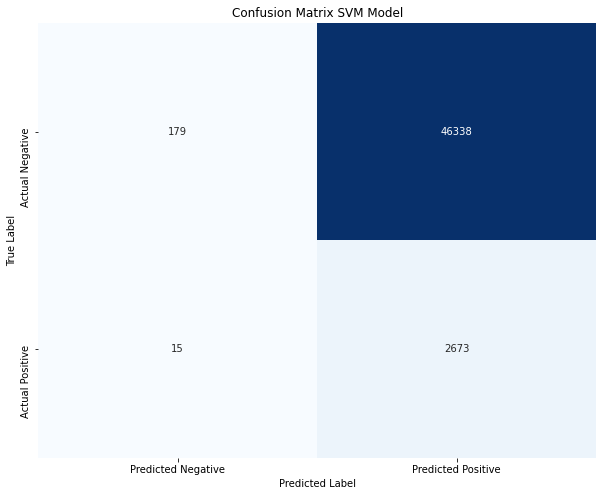

In [45]:
# Visualize the confusion matrix

svm_conf_matrix = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(svm_conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Model 3, Decision Tree Classifier

Finally we will build our Decision Tree Classifier usng the `DecisionTreeClassifier` class from SKLearn.

In [37]:
# Import our Tree model function from SkLearn

from sklearn.tree import DecisionTreeClassifier

In [38]:
# Initiate our tree classifier
# Criterion is set to Entropy
# Max_Depth is set to 5
# Min Sample Split is set to 5
# Max Leaf Nodes is set to 20

tc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_split = 5, max_leaf_nodes = 20)

In [40]:
# Train it with the sets we already have prepared

tc.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
tc_pred = tc.predict(X_test)

tc_pred = svm.predict(X_test)

tc_acc = accuracy_score(y_test, tc_pred)
tc_prec = precision_score(y_test, tc_pred)
tc_rec = recall_score(y_test, tc_pred)
tc_f1 = f1_score(y_test, tc_pred)

print("Tree Classifier Accuracy:", tc_acc)
print("Tree Classifier Precision:", tc_prec)
print("Tree Classifier Recall:", tc_rec)
print("Tree Classifier F1 Score:", tc_f1)

Tree Classifier Accuracy: 0.05796158926938319
Tree Classifier Precision: 0.054538777009242825
Tree Classifier Recall: 0.9944196428571429
Tree Classifier F1 Score: 0.10340625544014391


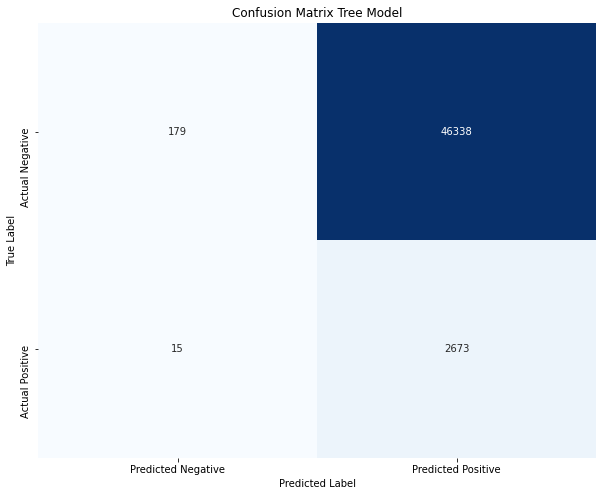

In [42]:
# Visualize the confusion matrix

tc_conf_matrix = confusion_matrix(y_test, tc_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(tc_conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Tree Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Part 3 - Model Evaluation

Let's now visualize all of the models on their accuracy, precission, recall and F1 score

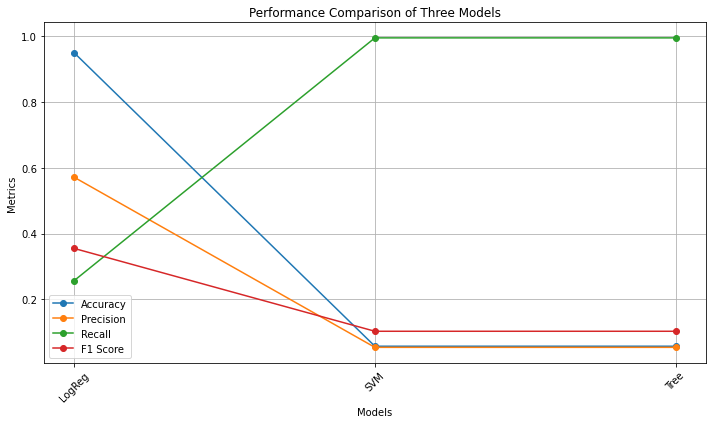

In [43]:
models = ['LogReg', 'SVM', 'Tree']
accuracy = [lg_acc, svm_acc, tc_acc]
precision = [lg_prec, svm_prec, tc_prec]
recall = [lg_rec, svm_rec, tc_rec]
f1 = [lg_f1,svm_f1,tc_f1]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracy, marker='o', label='Accuracy')
plt.plot(models, precision, marker='o', label='Precision')
plt.plot(models, recall, marker='o', label='Recall')
plt.plot(models, f1, marker='o', label='F1 Score')

plt.legend()
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Performance Comparison of Three Models')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In general, we can see that all models performed fairly poorly for our needs. Let's investigate our results one by one:

### Accuracy ###

Here our best performer was the `LogisticRegression` model, with a very high accuracy. Nonetheless, we can see that it performs really poorly in Recall, and looking at the Confusion Matrix we see a lot of False Negatives, meaning it would tell people they are healthy, when they are actually not.

For the `SVM` and `DecisionTree` models, we see that the accuracy is abissmal, and that is because it has a tendency of predicting most cases possitive, when in fact, most of them are negative.

### Precision ###

Once again, our simplest model, `LogisticRegression`, performed the best, and we can see from the Confusion Matrices, but it does predict several possitive cases as negative.

Also, `SVM` and `DecisionTree` models have an terrible precision and predict a lot of possitive cases negative.

### Recall ###

As mentioned before, the most important one for these kinds of systems. We can see that the `LogisticRegression` model performs poorly, and predicts many false negatives, which is terrible for our case.

Now the `SVM` and `DecisionTree` models seem to have a very high recall, but that is because they seem to play it very safe, and predict almost all cases possitive. The problem with models like this is that they would serve little purpose and not help systems filter patients since most would be moved towards having to see a doctor to diagnose.

### F1 Score ###

Here we can get a much better picture of our models, which all scored low to very low here. The `LogisticRegression` model scores best, but still low, because both precision and recall are not good, hence the overall performance is not good. As for the `SVM` and `DecisionTree` models as expected, have a very low score even though they score high on recall.

In summary, all base models do not perform great, nonetheless, this gives us a great starting point for future models.

# Conclussions

Some relevant conclusions for this case.

- The health data is incredibly relevant for predicting future health outcomes, and it can be used to create models that will help save millions in healthcare.
- It is possible to create great and very accurate models, but we must be weary of accuracy as it can distract us from what is useful.
- Improving recall in diagnostic models is vital, especially because this is an area where we absolutely have to avoid false negatives, since they can be so much more costly than false possitives.
- Basic linear models, in this case logistic regression, seem to give us a glimpse as to what we could do and where we should work to improve our models in the future.

- I would suggest testing other models with the data and diving deeper into the potential of the existing data.
- The quantity of data is limited in this experiment, since more data will return a better model, it is suggested that further experiments be done with much more than a couple hunded thousand observations (several millions would be good).
- Consider other data that can help improve the recall of the model, and get rid of variables that might be belitteling the model's performance.
- Finally, this leads us to considering ensamble models, which will take the advantages of the base models and make improve them. Consider XGBoost, Random Forests and other ensamble models to keep investigating a good model fit for this type of data.

# Repository

You can find the complete project, including this notebook, presentation slides and video presentation link in the following github repository:
https://github.com/jackraiferbaruch/machine_learning_supervised_models.